In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier


In [2]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
match =pd.read_csv("matches.csv")
match

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [4]:
deliveries = pd.read_csv("deliveries.csv")
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [5]:
delv1 = deliveries[deliveries["inning"] == 2]
delv1

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
125,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN
126,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN
127,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN
128,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [6]:
full_match = match.merge(delv1,left_on='id',right_on="match_id")

In [7]:
full_match["win"] = (full_match["batting_team"] == full_match["winner"]).astype(int)

In [8]:
full_match["venue"]

0                            M Chinnaswamy Stadium
1                            M Chinnaswamy Stadium
2                            M Chinnaswamy Stadium
3                            M Chinnaswamy Stadium
4                            M Chinnaswamy Stadium
                            ...                   
125736    MA Chidambaram Stadium, Chepauk, Chennai
125737    MA Chidambaram Stadium, Chepauk, Chennai
125738    MA Chidambaram Stadium, Chepauk, Chennai
125739    MA Chidambaram Stadium, Chepauk, Chennai
125740    MA Chidambaram Stadium, Chepauk, Chennai
Name: venue, Length: 125741, dtype: object

In [9]:
full_match.isnull().sum()

id                       0
season                   0
city                  6012
date                     0
match_type               0
player_of_match         27
venue                    0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                  27
result                   0
result_margin         1765
target_runs              0
target_overs             0
super_over               0
method              124387
umpire1                  0
umpire2                  0
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         118993
is_wicket                0
player_dismissed    119513
dismissal_kind      119513
fielder             121295
w

In [10]:
full_match.drop(["fielder","extras_type"],axis=1,inplace=True)

In [11]:
full_match.isnull().sum()

id                       0
season                   0
city                  6012
date                     0
match_type               0
player_of_match         27
venue                    0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                  27
result                   0
result_margin         1765
target_runs              0
target_overs             0
super_over               0
method              124387
umpire1                  0
umpire2                  0
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
is_wicket                0
player_dismissed    119513
dismissal_kind      119513
win                      0
dtype: int64

In [12]:
full_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125741 entries, 0 to 125740
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                125741 non-null  int64  
 1   season            125741 non-null  object 
 2   city              119729 non-null  object 
 3   date              125741 non-null  object 
 4   match_type        125741 non-null  object 
 5   player_of_match   125714 non-null  object 
 6   venue             125741 non-null  object 
 7   team1             125741 non-null  object 
 8   team2             125741 non-null  object 
 9   toss_winner       125741 non-null  object 
 10  toss_decision     125741 non-null  object 
 11  winner            125714 non-null  object 
 12  result            125741 non-null  object 
 13  result_margin     123976 non-null  float64
 14  target_runs       125741 non-null  float64
 15  target_overs      125741 non-null  float64
 16  super_over        12

In [13]:
full_match["team1"].unique

<bound method Series.unique of 0         Royal Challengers Bangalore
1         Royal Challengers Bangalore
2         Royal Challengers Bangalore
3         Royal Challengers Bangalore
4         Royal Challengers Bangalore
                     ...             
125736            Sunrisers Hyderabad
125737            Sunrisers Hyderabad
125738            Sunrisers Hyderabad
125739            Sunrisers Hyderabad
125740            Sunrisers Hyderabad
Name: team1, Length: 125741, dtype: object>

In [14]:
drop_team =["kochi Tuskers kerala",'Pune Warriors','Gujarat Lions','Rising Pune Supergiant','Rising Pune Supergiants',]

In [15]:
full_match.replace(['Royal Challengers Bangalore','Delhi Daredevils','Deccan Chargers','Kings XI Punjab'],['Royal Challengers Bengaluru','Delhi Capitals','Sunrisers Hyderabad', 'Punjab Kings'],inplace=True)

In [16]:
full_match["team2"].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bengaluru', 'Sunrisers Hyderabad',
       'Punjab Kings', 'Delhi Capitals', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Gujarat Lions', 'Rising Pune Supergiant', 'Gujarat Titans',
       'Lucknow Super Giants'], dtype=object)

In [17]:
teams2 = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals', 'Royal Challengers Bengaluru', 'Sunrisers Hyderabad',
       'Punjab Kings', 'Delhi Capitals', 'Mumbai Indians','Gujarat Titans','Lucknow Super Giants']

In [18]:
full_match = full_match[full_match["team1"].isin(teams2)]

In [19]:
full_match = full_match[full_match["team2"].isin(teams2)]

In [20]:
full_match.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'match_id', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs', 'is_wicket',
       'player_dismissed', 'dismissal_kind', 'win'],
      dtype='object')

In [21]:
full_match = full_match[full_match["super_over"]=="N"]

In [22]:
full_match

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,is_wicket,player_dismissed,dismissal_kind,win
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,...,R Dravid,AB Dinda,W Jaffer,1,0,1,0,NaN,NaN,0
1,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,...,W Jaffer,AB Dinda,R Dravid,0,1,1,0,NaN,NaN,0
2,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,...,W Jaffer,AB Dinda,R Dravid,0,0,0,0,NaN,NaN,0
3,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,...,W Jaffer,AB Dinda,R Dravid,1,0,1,0,NaN,NaN,0
4,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,...,R Dravid,AB Dinda,W Jaffer,1,0,1,0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125736,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,SS Iyer,AK Markram,VR Iyer,1,0,1,0,NaN,NaN,1
125737,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,VR Iyer,AK Markram,SS Iyer,1,0,1,0,NaN,NaN,1
125738,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,0,NaN,NaN,1
125739,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,0,NaN,NaN,1


In [23]:
full_match = full_match[full_match["method"] != "D/L"]

In [24]:
full_match["city"].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Bengaluru', 'Indore', 'Dubai', 'Sharjah', 'Navi Mumbai',
       'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

**We are include only home Ground match**

In [25]:
citys = ['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur','Hyderabad', 'Chennai','Ahmedabad','Cuttack', 'Nagpur', 'Dharamsala',
        'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi','Abu Dhabi','Bengaluru', 'Indore', 'Dubai', 'Sharjah', 'Navi Mumbai',
        'Lucknow', 'Guwahati', 'Mohali']

In [26]:
full_match = full_match[full_match["city"].isin(citys)]

In [27]:
full_match["city"].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Ahmedabad', 'Cuttack', 'Nagpur',
       'Dharamsala', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Bengaluru', 'Indore', 'Dubai', 'Sharjah',
       'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [28]:
full_match.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'match_id', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs', 'is_wicket',
       'player_dismissed', 'dismissal_kind', 'win'],
      dtype='object')

In [29]:
final_df= full_match[['id', 'season', 'city', 'date', 'match_type','team1','team2','winner','result', 'target_runs','match_id', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball','batsman_runs', 'extra_runs', 'total_runs', 'is_wicket','player_dismissed', 'win']]

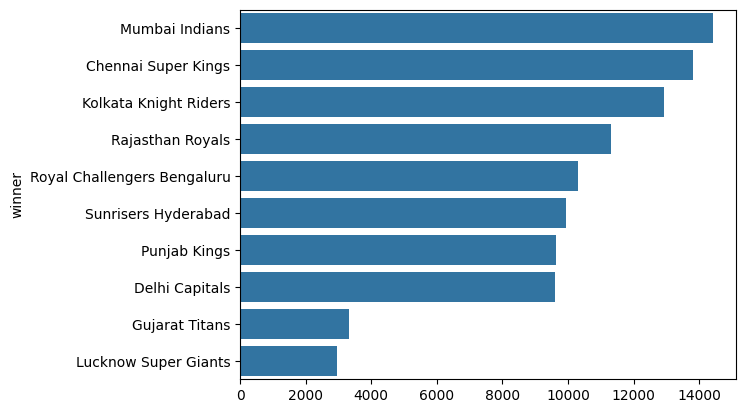

In [30]:
# final_df.groupby('city',as_index=False)
win= final_df["winner"].value_counts()
sns.barplot(y=win.index,x=win.values)
plt.show()

In [31]:
final_df2_copy= final_df[final_df["season"]=='2014' ]
final_df3_copy= final_df2_copy[final_df2_copy["city"]=='Ahmedabad']
final_df3_copy["winner"].unique()

array(['Rajasthan Royals', 'Sunrisers Hyderabad', 'Mumbai Indians'],
      dtype=object)

In [32]:
City_wise_win_data= final_df.groupby(['match_id','city','winner'],as_index=False)["win"].sum()
# City_wise_win_data
City_data_win_data_A=City_wise_win_data[City_wise_win_data["city"] =="Abu Dhabi"]
City_data_win_data_A["winner"].value_counts()

winner
Mumbai Indians                 8
Kolkata Knight Riders          7
Rajasthan Royals               6
Chennai Super Kings            4
Delhi Capitals                 3
Sunrisers Hyderabad            3
Punjab Kings                   2
Royal Challengers Bengaluru    2
Name: count, dtype: int64

In [33]:
final_df["current_score"] = final_df.groupby("match_id")["total_runs"].cumsum()

C:\Users\dixit\AppData\Local\Temp\ipykernel_5904\2217145181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["current_score"] = final_df.groupby("match_id")["total_runs"].cumsum()


In [34]:
final_df

,id,season,city,date,match_type,team1,team2,winner,result,target_runs,...,bowling_team,over,ball,batsman_runs,extra_runs,total_runs,is_wicket,player_dismissed,win,current_score
0,335982,2007/08,Bangalore,2008-04-18,League,Royal Challengers Bengaluru,Kolkata Knight Riders,Kolkata Knight Riders,runs,223.0,...,Kolkata Knight Riders,0,1,1,0,1,0,NaN,0,1
1,335982,2007/08,Bangalore,2008-04-18,League,Royal Challengers Bengaluru,Kolkata Knight Riders,Kolkata Knight Riders,runs,223.0,...,Kolkata Knight Riders,0,2,0,1,1,0,NaN,0,2
2,335982,2007/08,Bangalore,2008-04-18,League,Royal Challengers Bengaluru,Kolkata Knight Riders,Kolkata Knight Riders,runs,223.0,...,Kolkata Knight Riders,0,3,0,0,0,0,NaN,0,2
3,335982,2007/08,Bangalore,2008-04-18,League,Royal Challengers Bengaluru,Kolkata Knight Riders,Kolkata Knight Riders,runs,223.0,...,Kolkata Knight Riders,0,4,1,0,1,0,NaN,0,3
4,335982,2007/08,Bangalore,2008-04-18,League,Royal Challengers Bengaluru,Kolkata Knight Riders,Kolkata Knight Riders,runs,223.0,...,Kolkata Knight Riders,0,5,1,0,1,0,NaN,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125736,1426312,2024,Chennai,2024-05-26,Final,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,wickets,114.0,...,Sunrisers Hyderabad,9,5,1,0,1,0,NaN,1,110
125737,1426312,2024,Chennai,2024-05-26,Final,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,wickets,114.0,...,Sunrisers Hyderabad,9,6,1,0,1,0,NaN,1,111
125738,1426312,2024,Chennai,2024-05-26,Final,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,wickets,114.0,...,Sunrisers Hyderabad,10,1,1,0,1,0,NaN,1,112
125739,1426312,2024,Chennai,2024-05-26,Final,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,wickets,114.0,...,Sunrisers Hyderabad,10,2,1,0,1,0,NaN,1,113


In [35]:
final_df["runs_left"] = final_df["target_runs"] - final_df["current_score"]

C:\Users\dixit\AppData\Local\Temp\ipykernel_5904\543449478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["runs_left"] = final_df["target_runs"] - final_df["current_score"]


In [36]:
final_df["balls_left"] = 120 - (final_df["over"]*6+ final_df["ball"])

C:\Users\dixit\AppData\Local\Temp\ipykernel_5904\3548988369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["balls_left"] = 120 - (final_df["over"]*6+ final_df["ball"])


In [37]:
final_df["player_dismissed"].value_counts()

player_dismissed
RG Sharma        91
V Kohli          75
SV Samson        68
DA Warner        67
S Dhawan         66
                 ..
VS Yeligati       1
S Anirudha        1
A Mukund          1
A Chopra          1
Navdeep Saini     1
Name: count, Length: 525, dtype: int64

In [38]:
final_df["wickets"] = final_df.groupby('match_id')["is_wicket"].cumsum()

C:\Users\dixit\AppData\Local\Temp\ipykernel_5904\4163670699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["wickets"] = final_df.groupby('match_id')["is_wicket"].cumsum()


In [39]:
final_df["wickets"].value_counts()

wickets
0     19999
1     19260
2     16846
3     14246
4     10567
5      6737
6      4552
7      2939
8      1923
9      1058
10       95
Name: count, dtype: int64

In [40]:
final_df["wickets_left"] = 10 - final_df["wickets"]

C:\Users\dixit\AppData\Local\Temp\ipykernel_5904\1742561420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["wickets_left"] = 10 - final_df["wickets"]


In [41]:
final_df["current_run_rate"] =final_df["current_score"]*6/( 120 - (final_df["balls_left"]))

C:\Users\dixit\AppData\Local\Temp\ipykernel_5904\2318273253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["current_run_rate"] =final_df["current_score"]*6/( 120 - (final_df["balls_left"]))


In [42]:
# final_df
final_df["rrr"] = final_df["runs_left"]* 6 / final_df["balls_left"]

C:\Users\dixit\AppData\Local\Temp\ipykernel_5904\3309192835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["rrr"] = final_df["runs_left"]* 6 / final_df["balls_left"]


In [43]:
analysis_data =  final_df[["match_id","batting_team","bowling_team","city","target_runs","current_score","runs_left","wickets_left","balls_left","current_run_rate","rrr","win"]]

In [44]:
final_df

,id,season,city,date,match_type,team1,team2,winner,result,target_runs,...,is_wicket,player_dismissed,win,current_score,runs_left,balls_left,wickets,wickets_left,current_run_rate,rrr
0,335982,2007/08,Bangalore,2008-04-18,League,Royal Challengers Bengaluru,Kolkata Knight Riders,Kolkata Knight Riders,runs,223.0,...,0,NaN,0,1,222.0,119,0,10,6.000000,11.193277
1,335982,2007/08,Bangalore,2008-04-18,League,Royal Challengers Bengaluru,Kolkata Knight Riders,Kolkata Knight Riders,runs,223.0,...,0,NaN,0,2,221.0,118,0,10,6.000000,11.237288
2,335982,2007/08,Bangalore,2008-04-18,League,Royal Challengers Bengaluru,Kolkata Knight Riders,Kolkata Knight Riders,runs,223.0,...,0,NaN,0,2,221.0,117,0,10,4.000000,11.333333
3,335982,2007/08,Bangalore,2008-04-18,League,Royal Challengers Bengaluru,Kolkata Knight Riders,Kolkata Knight Riders,runs,223.0,...,0,NaN,0,3,220.0,116,0,10,4.500000,11.379310
4,335982,2007/08,Bangalore,2008-04-18,League,Royal Challengers Bengaluru,Kolkata Knight Riders,Kolkata Knight Riders,runs,223.0,...,0,NaN,0,4,219.0,115,0,10,4.800000,11.426087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125736,1426312,2024,Chennai,2024-05-26,Final,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,wickets,114.0,...,0,NaN,1,110,4.0,61,2,8,11.186441,0.393443
125737,1426312,2024,Chennai,2024-05-26,Final,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,wickets,114.0,...,0,NaN,1,111,3.0,60,2,8,11.100000,0.300000
125738,1426312,2024,Chennai,2024-05-26,Final,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,wickets,114.0,...,0,NaN,1,112,2.0,59,2,8,11.016393,0.203390
125739,1426312,2024,Chennai,2024-05-26,Final,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,wickets,114.0,...,0,NaN,1,113,1.0,58,2,8,10.935484,0.103448


In [45]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

def ipl_win_predictor(df, match_id):
    """
    Takes full IPL ball-by-ball data, trains a logistic regression model,
    and returns a DataFrame for a given match_id with overs completed,
    runs scored, wickets lost, and win/loss probabilities.
    """
    # Filter only required columns
    df = df.copy()


    
   
    df['cumulative_runs'] = df.groupby(['match_id', 'inning'])['total_runs'].cumsum()
    df['overs_completed'] = df['over'] + (df['ball'] / 6.0)
   
    features = ['runs_left', 'balls_left', 'wickets_left']
    X = df[features]
    y = df['win']
    
    # Train/test split for model fitting (though for production you'd train separately)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Pipeline with scaling + logistic regression
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
    ])
    pipe.fit(X_train, y_train)
    
    # Filter only rows for the given match_id
    match_df = df[df['match_id'] == match_id].copy()
    match_X = match_df[features]
    
    # Predict probabilities
    probs = pipe.predict_proba(match_X)
    match_df['loss_probability'] = probs[:, 0] *100
    match_df['win_probability'] = probs[:, 1] *100
    
    # Return required columns aggregated at over level
    result = match_df.groupby(['match_id', 'over']).agg({
        'overs_completed':'max',
        'cumulative_runs':'max',
        'wickets':'max',
        'is_wicket':'sum',
        'total_runs':'sum',
        'win_probability':'last',
        'loss_probability':'last'
    }).reset_index()
    target = [df[df["match_id"]==match_id].target_runs.values[1]]
    # print("target is ",[df[df["match_id"]==match_id].target_runs.values[1]])
    print("target is ",target[0])
    result.rename(columns={
        'comulative_runs':'runs_after_over',
        'cumulative_wickets':'wickets_lost'
    }, inplace=True)
    
    return result


target is  205.0


C:\Users\dixit\AppData\Local\Temp\ipykernel_5904\1411381302.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


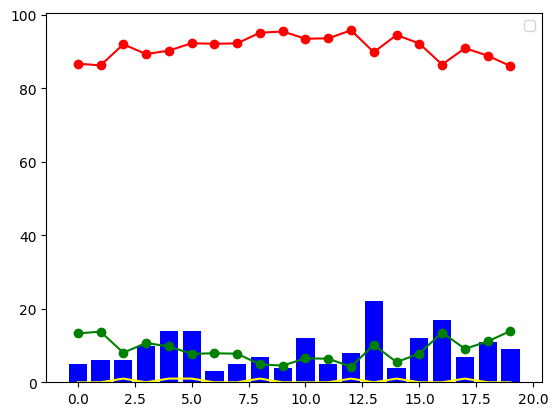

In [46]:
output = ipl_win_predictor(final_df,336014)
output
plt.plot(output["over"],output["win_probability"],marker="o",color="green")
plt.plot(output["over"],output["loss_probability"],marker="o",color="red")
plt.plot(output["over"],output["is_wicket"],color="yellow")
plt.bar(output["over"],output["total_runs"],color="blue")
plt.legend()
plt.show()

In [47]:
data =  final_df[["batting_team","bowling_team","city","target_runs","runs_left","wickets_left","balls_left","current_run_rate","rrr","win"]]

In [48]:
data

,batting_team,bowling_team,city,target_runs,runs_left,wickets_left,balls_left,current_run_rate,rrr,win
0,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,223.0,222.0,10,119,6.000000,11.193277,0
1,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,223.0,221.0,10,118,6.000000,11.237288,0
2,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,223.0,221.0,10,117,4.000000,11.333333,0
3,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,223.0,220.0,10,116,4.500000,11.379310,0
4,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,223.0,219.0,10,115,4.800000,11.426087,0
...,...,...,...,...,...,...,...,...,...,...
125736,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,114.0,4.0,8,61,11.186441,0.393443,1
125737,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,114.0,3.0,8,60,11.100000,0.300000,1
125738,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,114.0,2.0,8,59,11.016393,0.203390,1
125739,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,114.0,1.0,8,58,10.935484,0.103448,1


<Axes: >

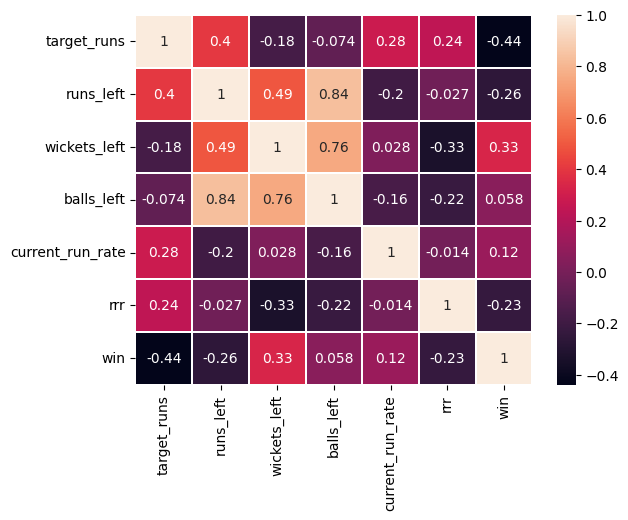

In [49]:
import seaborn as sns
# numeric_data = data.select_dtypes('number') 
# sns.heatmap(data.select_dtypes('number'))
# numeric_data

num = data.corr(numeric_only=True)
sns.heatmap(num,annot=True,linewidths=0.1)

<Figure size 1200x1200 with 0 Axes>

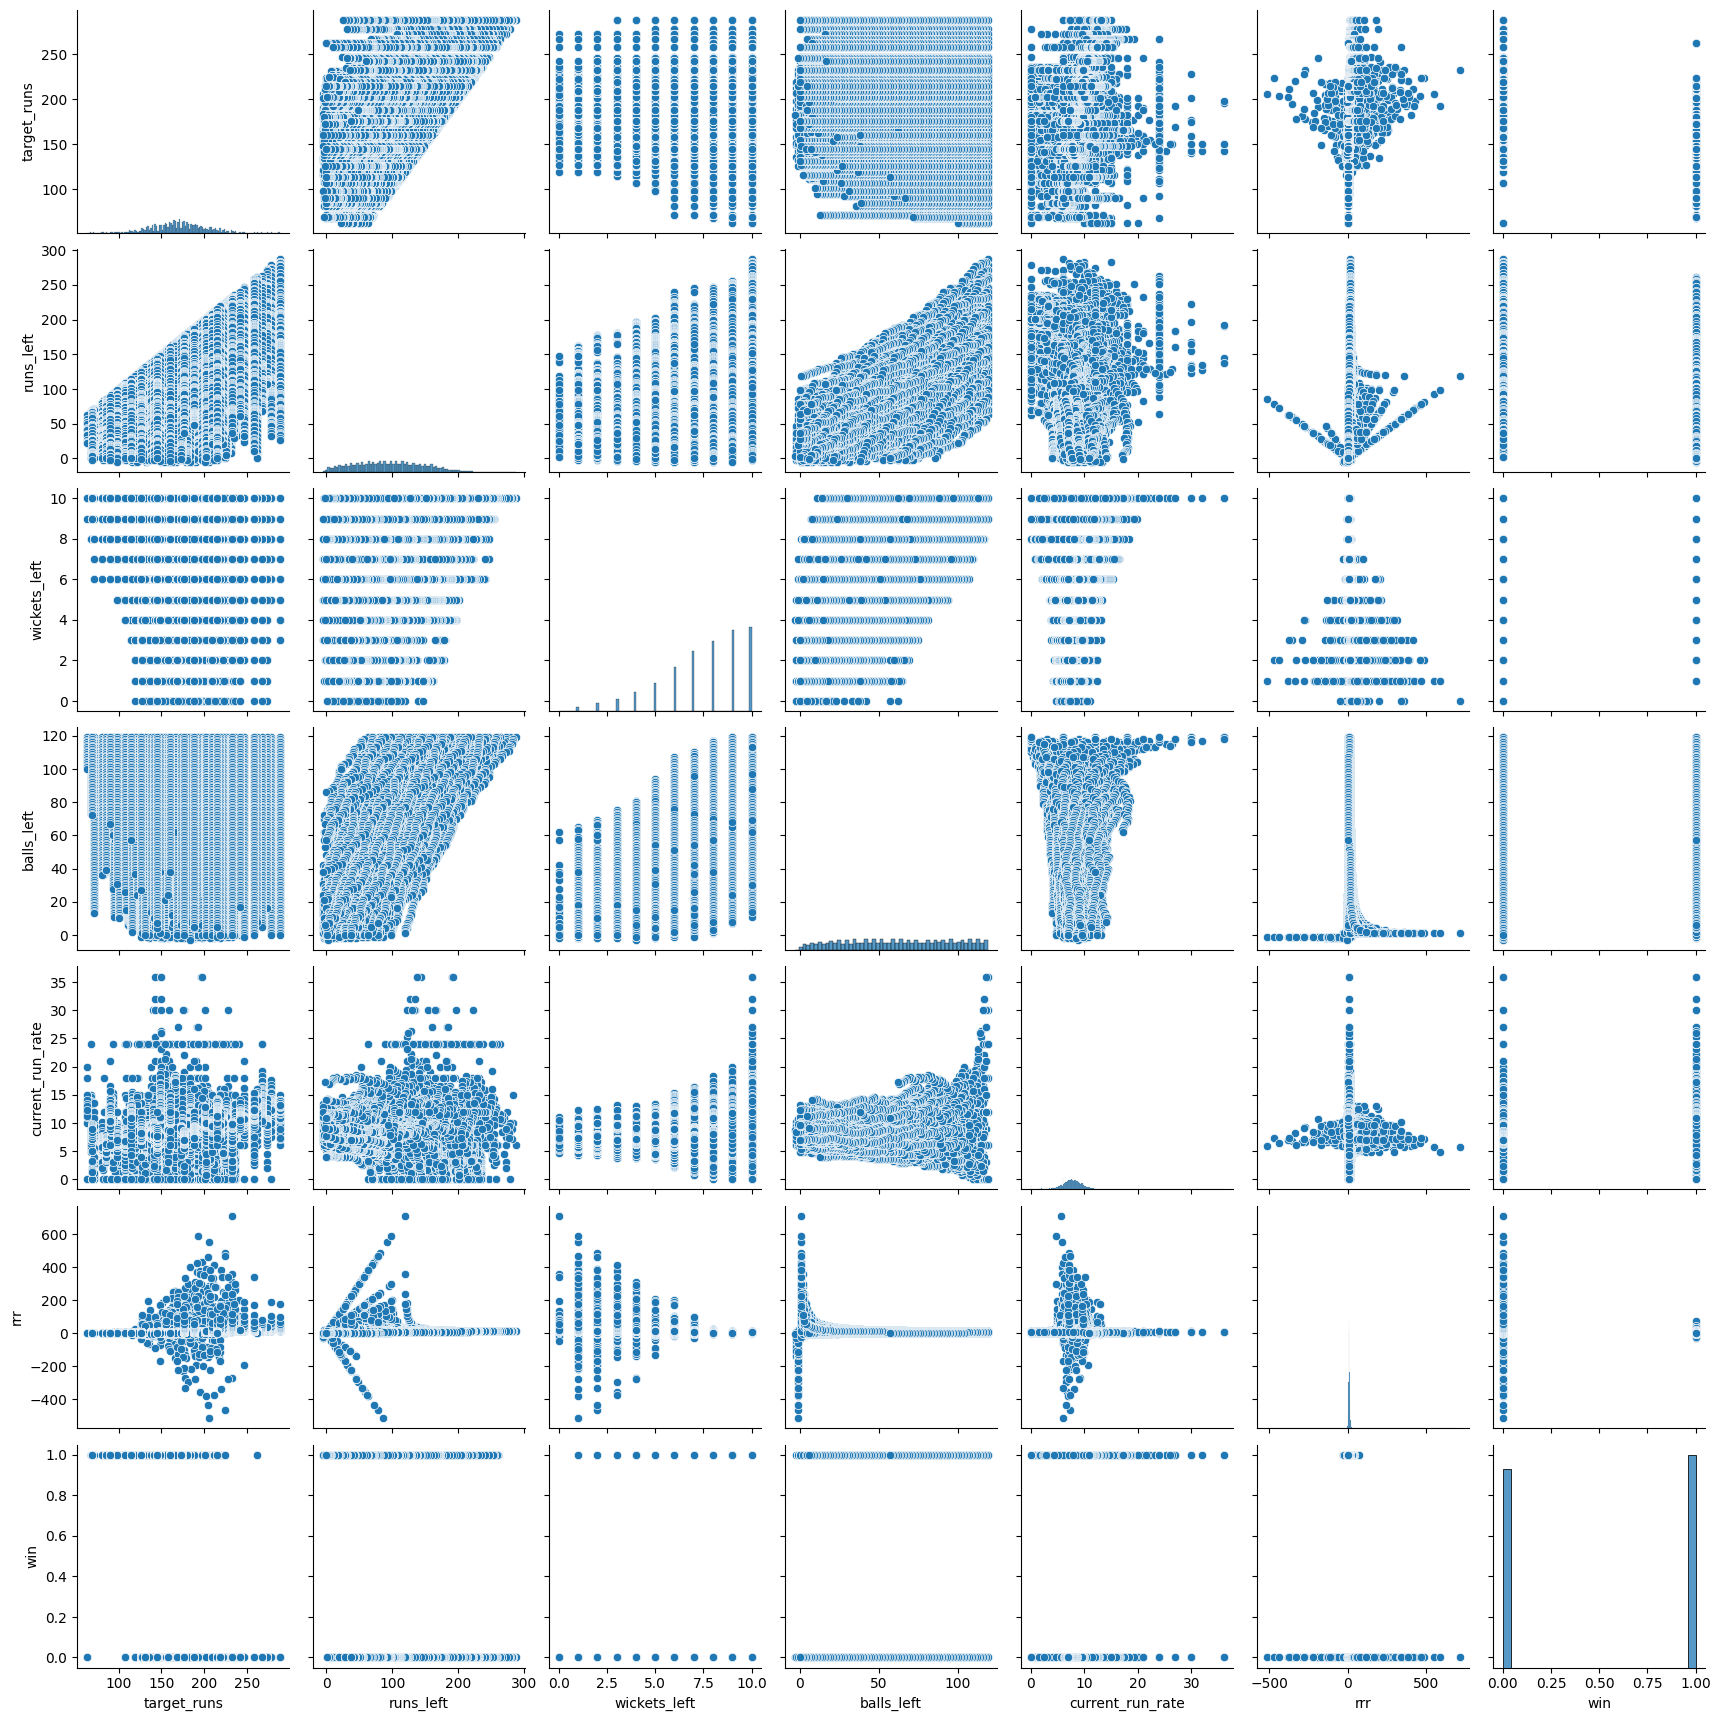

In [50]:
plt.figure(figsize=(12,12))
sns.pairplot(data)

In [51]:
data2= data[data["balls_left"]!= 0]

In [52]:
data3 = data2.sample(data2.shape[0])

In [53]:
data3

,batting_team,bowling_team,city,target_runs,runs_left,wickets_left,balls_left,current_run_rate,rrr,win
53238,Rajasthan Royals,Delhi Capitals,Delhi,185.0,105.0,6,53,7.164179,11.886792,1
23739,Rajasthan Royals,Mumbai Indians,Jaipur,95.0,69.0,9,71,3.183673,5.830986,1
16538,Royal Challengers Bengaluru,Punjab Kings,Chandigarh,182.0,167.0,10,106,6.428571,9.452830,1
40731,Chennai Super Kings,Sunrisers Hyderabad,Chennai,160.0,77.0,8,55,7.661538,8.400000,1
82870,Mumbai Indians,Royal Challengers Bengaluru,Mumbai,172.0,102.0,10,78,10.000000,7.846154,1
...,...,...,...,...,...,...,...,...,...,...
94354,Kolkata Knight Riders,Royal Challengers Bengaluru,Chennai,205.0,205.0,10,119,0.000000,10.336134,0
2771,Punjab Kings,Royal Challengers Bengaluru,Bangalore,127.0,74.0,9,80,7.950000,5.550000,1
83393,Kolkata Knight Riders,Royal Challengers Bengaluru,Kolkata,214.0,99.0,6,30,7.666667,19.800000,0
19977,Mumbai Indians,Chennai Super Kings,Mumbai,169.0,55.0,4,18,6.705882,18.333333,0


In [54]:
x= data3.drop("win",axis=1)
y=data3["win"]

In [55]:
x

,batting_team,bowling_team,city,target_runs,runs_left,wickets_left,balls_left,current_run_rate,rrr
53238,Rajasthan Royals,Delhi Capitals,Delhi,185.0,105.0,6,53,7.164179,11.886792
23739,Rajasthan Royals,Mumbai Indians,Jaipur,95.0,69.0,9,71,3.183673,5.830986
16538,Royal Challengers Bengaluru,Punjab Kings,Chandigarh,182.0,167.0,10,106,6.428571,9.452830
40731,Chennai Super Kings,Sunrisers Hyderabad,Chennai,160.0,77.0,8,55,7.661538,8.400000
82870,Mumbai Indians,Royal Challengers Bengaluru,Mumbai,172.0,102.0,10,78,10.000000,7.846154
...,...,...,...,...,...,...,...,...,...
94354,Kolkata Knight Riders,Royal Challengers Bengaluru,Chennai,205.0,205.0,10,119,0.000000,10.336134
2771,Punjab Kings,Royal Challengers Bengaluru,Bangalore,127.0,74.0,9,80,7.950000,5.550000
83393,Kolkata Knight Riders,Royal Challengers Bengaluru,Kolkata,214.0,99.0,6,30,7.666667,19.800000
19977,Mumbai Indians,Chennai Super Kings,Mumbai,169.0,55.0,4,18,6.705882,18.333333


In [56]:
numeric_columns= x.select_dtypes('number').columns
cate = ['batting_team','bowling_team','city']

In [57]:
p1 = ColumnTransformer([
    ('t1',StandardScaler(),numeric_columns),
    ('t2',OneHotEncoder(sparse_output=False,dtype='int',drop='first',handle_unknown='ignore'),cate)
])

In [58]:
X = p1.fit_transform(x)
X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [59]:
l1 = LogisticRegression(penalty='l1',solver='liblinear',C=0.5)
l1.fit(X_train,Y_train)
l1.score(X_test,Y_test)

0.8100183886126814

In [60]:
R1 = RandomForestClassifier(n_estimators=100,max_depth=15,min_samples_leaf=5,random_state=42)
R1.fit(X_train,Y_train)
# R1.predict_proba(X_test)\
R1.score(X_test,Y_test)

0.951168017435129

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [62]:
pip = Pipeline([
    ('p1',p1),
    ('p2', RandomForestClassifier(n_estimators=100,max_depth=15,min_samples_leaf=25,random_state=42))
])

In [63]:
pip.fit(x_train,y_train)

,steps,"[('p1', ...), ('p2', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('t1', ...), ('t2', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [64]:
pip.predict_proba(x_test)

array([[0.03264529, 0.96735471],
       [0.96473525, 0.03526475],
       [0.97948505, 0.02051495],
       ...,
       [0.15581879, 0.84418121],
       [0.27975708, 0.72024292],
       [0.94105898, 0.05894102]], shape=(29366, 2))

In [65]:
import pickle
pickle.dump(pip,open("pip.pickle",'wb'))

In [66]:
x_train

,batting_team,bowling_team,city,target_runs,runs_left,wickets_left,balls_left,current_run_rate,rrr
106506,Sunrisers Hyderabad,Royal Challengers Bengaluru,Mumbai,193.0,156.0,8,85,6.342857,11.011765
83418,Kolkata Knight Riders,Royal Challengers Bengaluru,Kolkata,214.0,42.0,6,8,9.214286,31.500000
15646,Punjab Kings,Kolkata Knight Riders,Chandigarh,184.0,95.0,7,42,6.846154,13.571429
34743,Chennai Super Kings,Delhi Capitals,Chennai,115.0,59.0,10,77,7.813953,4.597403
82323,Delhi Capitals,Kolkata Knight Riders,Kolkata,179.0,53.0,8,37,9.108434,8.594595
...,...,...,...,...,...,...,...,...,...
30024,Kolkata Knight Riders,Punjab Kings,Kolkata,135.0,63.0,8,56,6.750000,6.750000
72554,Punjab Kings,Delhi Capitals,Chandigarh,167.0,44.0,7,39,9.111111,6.769231
95272,Punjab Kings,Mumbai Indians,Chennai,132.0,33.0,9,30,6.600000,6.600000
124373,Chennai Super Kings,Gujarat Titans,Ahmedabad,232.0,67.0,4,19,9.801980,21.157895


In [67]:
pip.score(x_test,y_test)

0.9096574269563441

In [68]:
print(f"{data2["batting_team"][0]}:{pip.predict_proba(data2)[5][1]}")

Royal Challengers Bengaluru:0.08442788725609576


In [69]:
print(f",{data2['batting_team'][0]}: {pip.predict_proba(data2)[0][0]:.2%}")

,Royal Challengers Bengaluru: 87.82%


In [70]:
i = 26
prob = pip.predict_proba(data2)[i][0]
prob2 =pip.predict_proba(data2)[i][1]
print(f",{data2['batting_team'][i]}: {prob:.2%}")
print(f",{data2["bowling_team"][i]}:{prob2:.2%}")

,Royal Challengers Bengaluru: 96.62%
,Kolkata Knight Riders:3.38%


In [71]:
i = 0
prob = pip.predict_proba(data2)[i][0]
prob2 =pip.predict_proba(data2)[i][1]
print(f",{data2['batting_team'][i]}: {prob:.2%}")
print(f",{data2["bowling_team"][i]}:{prob2:.2%}")

,Royal Challengers Bengaluru: 87.82%
,Kolkata Knight Riders:12.18%


In [72]:
data2["batting_team"][0]

'Royal Challengers Bengaluru'

In [73]:
pip.predict_proba(x_test)[809]

array([0.11693017, 0.88306983])

In [74]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

def ipl_win_predictor2(df, match_id):
    """
    Takes full IPL ball-by-ball data, trains a logistic regression model,
    and returns a DataFrame for a given match_id with overs completed,
    runs scored, wickets lost, and win/loss probabilities.
    """
    # Filter only required columns
    df = df.copy()


    
   
    df['cumulative_runs'] = df.groupby(['match_id', 'inning'])['total_runs'].cumsum()
    df['overs_completed'] = df['over'] + (df['ball'] / 6.0)
   
    features = ['runs_left', 'balls_left', 'wickets_left']
    X = df[features]
    y = df['win']
    
    # Train/test split for model fitting (though for production you'd train separately)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Pipeline with scaling + logistic regression
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestClassifier(n_estimators=100,max_depth=17,min_samples_leaf=25,random_state=42))
    ])
    pipe.fit(X_train, y_train)
    # print(pipe.score(x_test,y_test))
    
    # Filter only rows for the given match_id
    match_df = df[df['match_id'] == match_id].copy()
    match_X = match_df[features]
    
    # Predict probabilities
    probs = pipe.predict_proba(match_X)
    match_df['loss_probability'] = probs[:, 0] *100
    match_df['win_probability'] = probs[:, 1] *100
    
    # Return required columns aggregated at over level
    result = match_df.groupby(['match_id', 'over']).agg({
        'overs_completed':'max',
        'cumulative_runs':'max',
        'wickets':'max',
        'is_wicket':'sum',
        'total_runs':'sum',
        'win_probability':'last',
        'loss_probability':'last'
    }).reset_index()
    target = [df[df["match_id"]==match_id].target_runs.values[1]]
    # print("target is ",[df[df["match_id"]==match_id].target_runs.values[1]])
    print("target is ",target[0])
    result.rename(columns={
        'comulative_runs':'runs_after_over',
        'cumulative_wickets':'wickets_lost'
    }, inplace=True)
    
    return result


target is  209.0


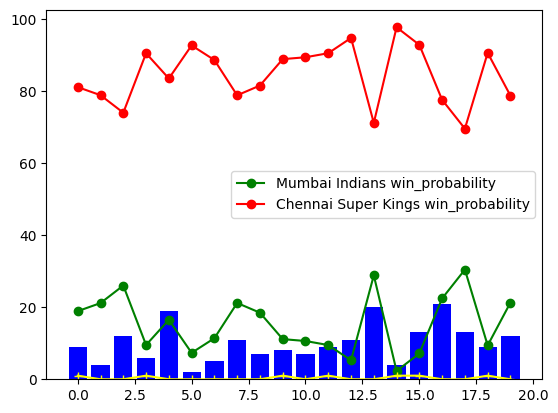

In [75]:
i =335989
output2=  ipl_win_predictor2(final_df,i)
output2
team1 = final_df[final_df["match_id"]==i].batting_team.iloc[0]
team2 =final_df[final_df["match_id"]==i].bowling_team.iloc[0]
# team2 = final_df[final_df["match_id"]==i].team2.iloc[0]
plt.plot(output2["over"],output2["win_probability"],marker="o",color="green",label=f'{team1} win_probability')
plt.plot(output2["over"],output2["loss_probability"],marker="o",color="red",label=f'{team2} win_probability')
plt.plot(output2["over"],output2["is_wicket"],marker="+",color="yellow")
plt.bar(output2["over"],output2["total_runs"],color="blue")
plt.legend()
plt.show()

target is  215.0


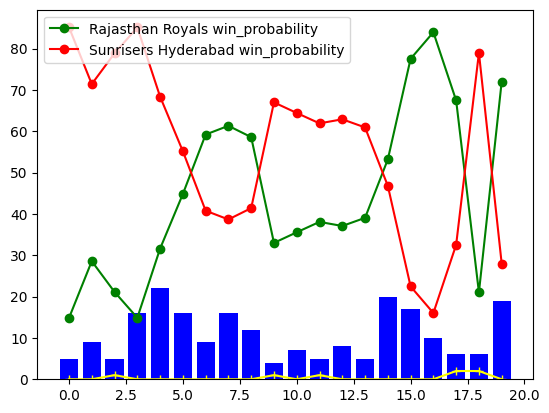

In [76]:
i =335990
output2=  ipl_win_predictor2(final_df,i)
output2
team1 = final_df[final_df["match_id"]==i].batting_team.iloc[0]
team2 =final_df[final_df["match_id"]==i].bowling_team.iloc[0]
# team2 = final_df[final_df["match_id"]==i].team2.iloc[0]
plt.plot(output2["over"],output2["win_probability"],marker="o",color="green",label=f'{team1} win_probability')
plt.plot(output2["over"],output2["loss_probability"],marker="o",color="red",label=f'{team2} win_probability')
plt.plot(output2["over"],output2["is_wicket"],marker="+",color="yellow")
plt.bar(output2["over"],output2["total_runs"],color="blue")
plt.legend()
plt.show()

In [77]:
output2

,match_id,over,overs_completed,cumulative_runs,wickets,is_wicket,total_runs,win_probability,loss_probability
0,335990,0,1.000000,5,0,0,5,14.830158,85.169842
1,335990,1,2.000000,14,0,0,9,28.571792,71.428208
2,335990,2,3.000000,19,1,1,5,21.128141,78.871859
3,335990,3,4.166667,35,1,0,16,14.868410,85.131590
4,335990,4,5.000000,57,1,0,22,31.613285,68.386715
5,335990,5,6.000000,73,1,0,16,44.831340,55.168660
6,335990,6,7.000000,82,1,0,9,59.216824,40.783176
7,335990,7,8.000000,98,1,0,16,61.328513,38.671487
8,335990,8,9.000000,110,1,0,12,58.589208,41.410792
9,335990,9,10.000000,114,2,1,4,33.000226,66.999774


target is  209.0


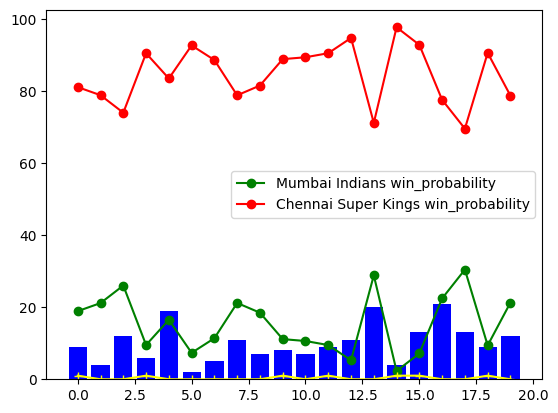

In [78]:
i =335989
output2=  ipl_win_predictor2(final_df,i)
output2
team1 = final_df[final_df["match_id"]==i].batting_team.iloc[0]
team2 =final_df[final_df["match_id"]==i].bowling_team.iloc[0]
# team2 = final_df[final_df["match_id"]==i].team2.iloc[0]
plt.plot(output2["over"],output2["win_probability"],marker="o",color="green",label=f'{team1} win_probability')
plt.plot(output2["over"],output2["loss_probability"],marker="o",color="red",label=f'{team2} win_probability')
plt.plot(output2["over"],output2["is_wicket"],marker="+",color="yellow")
plt.bar(output2["over"],output2["total_runs"],color="blue")
plt.legend()
plt.show()

In [79]:
output2

,match_id,over,overs_completed,cumulative_runs,wickets,is_wicket,total_runs,win_probability,loss_probability
0,335989,0,1.333333,9,1,1,9,18.910071,81.089929
1,335989,1,2.000000,13,1,0,4,21.150948,78.849052
2,335989,2,3.000000,25,1,0,12,26.019116,73.980884
3,335989,3,4.000000,31,2,1,6,9.515436,90.484564
4,335989,4,5.000000,50,2,0,19,16.510882,83.489118
5,335989,5,6.000000,52,2,0,2,7.333876,92.666124
6,335989,6,7.000000,57,2,0,5,11.393214,88.606786
7,335989,7,8.166667,68,2,0,11,21.180392,78.819608
8,335989,8,9.000000,75,2,0,7,18.473188,81.526812
9,335989,9,10.000000,83,3,1,8,11.144346,88.855654


In [80]:
df = final_df[(final_df["match_id"]==i) & (final_df["over"]==14)]
df[['batting_team', 'bowling_team', 'city', 'target_runs', 'runs_left',
       'wickets_left', 'balls_left', 'current_run_rate', 'rrr', 'win']]

,batting_team,bowling_team,city,target_runs,runs_left,wickets_left,balls_left,current_run_rate,rrr,win
860,Mumbai Indians,Chennai Super Kings,Chennai,209.0,79.0,6,35,9.176471,13.542857,0
861,Mumbai Indians,Chennai Super Kings,Chennai,209.0,79.0,5,34,9.069767,13.941176,0
862,Mumbai Indians,Chennai Super Kings,Chennai,209.0,77.0,5,33,9.103448,14.000000,0
863,Mumbai Indians,Chennai Super Kings,Chennai,209.0,76.0,5,32,9.068182,14.250000,0
864,Mumbai Indians,Chennai Super Kings,Chennai,209.0,75.0,5,31,9.033708,14.516129,0
865,Mumbai Indians,Chennai Super Kings,Chennai,209.0,75.0,5,30,8.933333,15.000000,0


In [81]:
x_train["city"].unique()

array(['Mumbai', 'Kolkata', 'Chandigarh', 'Chennai', 'Hyderabad',
       'Abu Dhabi', 'Pune', 'Delhi', 'Lucknow', 'Jaipur', 'Bengaluru',
       'Dubai', 'Ahmedabad', 'Mohali', 'Bangalore', 'Navi Mumbai',
       'Visakhapatnam', 'Guwahati', 'Cuttack', 'Dharamsala', 'Sharjah',
       'Indore', 'Nagpur', 'Raipur', 'Ranchi'], dtype=object)

In [82]:
x_train

,batting_team,bowling_team,city,target_runs,runs_left,wickets_left,balls_left,current_run_rate,rrr
106506,Sunrisers Hyderabad,Royal Challengers Bengaluru,Mumbai,193.0,156.0,8,85,6.342857,11.011765
83418,Kolkata Knight Riders,Royal Challengers Bengaluru,Kolkata,214.0,42.0,6,8,9.214286,31.500000
15646,Punjab Kings,Kolkata Knight Riders,Chandigarh,184.0,95.0,7,42,6.846154,13.571429
34743,Chennai Super Kings,Delhi Capitals,Chennai,115.0,59.0,10,77,7.813953,4.597403
82323,Delhi Capitals,Kolkata Knight Riders,Kolkata,179.0,53.0,8,37,9.108434,8.594595
...,...,...,...,...,...,...,...,...,...
30024,Kolkata Knight Riders,Punjab Kings,Kolkata,135.0,63.0,8,56,6.750000,6.750000
72554,Punjab Kings,Delhi Capitals,Chandigarh,167.0,44.0,7,39,9.111111,6.769231
95272,Punjab Kings,Mumbai Indians,Chennai,132.0,33.0,9,30,6.600000,6.600000
124373,Chennai Super Kings,Gujarat Titans,Ahmedabad,232.0,67.0,4,19,9.801980,21.157895


In [83]:
data3.columns

Index(['batting_team', 'bowling_team', 'city', 'target_runs', 'runs_left',
       'wickets_left', 'balls_left', 'current_run_rate', 'rrr', 'win'],
      dtype='object')